<a href="https://colab.research.google.com/github/leedy40259/Ybigta_summer/blob/main/0726_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('/content/drive/MyDrive/Ybigta_summer/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Ybigta_summer/movies_test.csv')

# 데이터 전처리

In [4]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [5]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [6]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [7]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [8]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [9]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 모델 생성 및 예측(과제부분)

In [10]:
train_x = train.drop(['box_off_num'],axis= 1)
train_y = train['box_off_num']

In [19]:
model=RandomForestRegressor(max_depth=5, n_estimators = 200, oob_score=True)
model.fit(train_x,train_y)


RandomForestRegressor(max_depth=5, n_estimators=200, oob_score=True)

In [20]:
pred = model.predict(test)

# 제출

In [22]:
submission = pd.read_csv('/content/drive/MyDrive/Ybigta_summer/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [23]:
submission['box_off_num'] = pred

In [24]:
submission

,title,box_off_num
0,용서는 없다,2.796714e+06
1,아빠가 여자를 좋아해,1.241286e+06
2,하모니,1.503811e+06
3,의형제,1.848024e+06
4,평행 이론,1.163026e+06
...,...,...
238,해에게서 소년에게,1.001625e+05
239,울보 권투부,3.176572e+04
240,어떤살인,2.791619e+05
241,말하지 못한 비밀,4.449703e+04


In [25]:
submission.to_csv('베이스라인.csv',index = False)

# 제출 점수(과제부분)

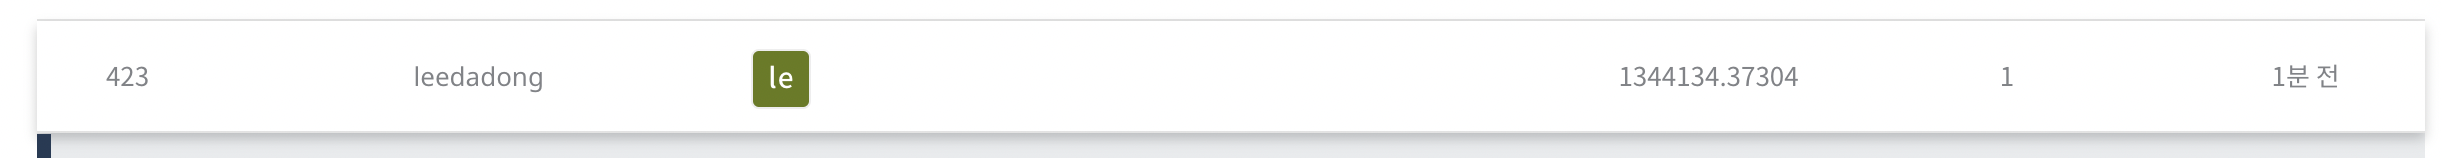